Steps: \
1. Built analyzer model 1 with NLTK VADER Sentiment scoring. \
2. Built analyzer model 2 with pretrained model (transformers) from Hugging Face ( Roberta pretrained model). \
3. Compare results and evaluated two models. \
4. Review examples : where the sentimentn score is most different than the model's prediction.

In [1]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import traceback
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
nltk.download('all')

In [3]:
reviews = pd.read_csv("/content/small_corpus.csv")

In [4]:
reviews.shape

(3600, 12)

In [5]:
reviews.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"05 13, 2017",A3B3FCU07DRFQ3,B0017ZIIK6,Terence J.,Gameplay isn't what u would expect,One Star,1494633600,NaN,{'Format:': ' Video Game'},NaN
1,1.0,True,"06 1, 2016",A856GJOH1UKKJ,B005EQE0YM,John Rightmer,Ok one year later and the damn headset fell apart. Turtlebeach you need to send me a new pair. I'm not a kid I'm 53 and I take care of my stuff but this is a joke.\n\nThey did have good sound and the mic was clear but they just fell apart.,junk,1464739200,7.0,{'Color:': ' Black'},['https://images-na.ssl-images-amazon.com/images/I/71Wq-18a9kL._SY88.jpg']
2,1.0,False,"11 2, 2005",A143O79A5RFJV7,B0009O7HVM,Pablo Nadal Moron,"This is the last time Lucasarts steals my money. So much expectation and publicity fot this piece of TRASH! They say it was going to be much better, but it isn't. The graphics of ""Battlefront"" are much better than this one, the graphics for part two are graphics of PC or Nintendo, are graphics of PC games of the mid 90's, for example ""Dark Forces"". The resolution it's terrible, a child can make them much better. The missions are easy and the AI isn't as good as they say. I don't care if there are new planets and troopers and if you can control Jedis, the game is boring and repetitive. The sequel is the end for this game. I WANT MY STOLEN MONEY BACK!!",BASHFUL!!,1130889600,4.0,{'Platform:': ' PlayStation2'},NaN


In [6]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [7]:
reviews.shape

(3599, 12)

Example of tokenizing and formatting one piece of text.

In [8]:
text = reviews['reviewText'][1]
print(text)

Ok one year later and the damn headset fell apart.  Turtlebeach you need to send me a new pair. I'm not a kid I'm 53 and I take care of my stuff but this is a joke.

They did have good sound and the mic was clear but they just fell apart.


In [9]:
tokens = nltk.word_tokenize(text)
print(tokens)

['Ok', 'one', 'year', 'later', 'and', 'the', 'damn', 'headset', 'fell', 'apart', '.', 'Turtlebeach', 'you', 'need', 'to', 'send', 'me', 'a', 'new', 'pair', '.', 'I', "'m", 'not', 'a', 'kid', 'I', "'m", '53', 'and', 'I', 'take', 'care', 'of', 'my', 'stuff', 'but', 'this', 'is', 'a', 'joke', '.', 'They', 'did', 'have', 'good', 'sound', 'and', 'the', 'mic', 'was', 'clear', 'but', 'they', 'just', 'fell', 'apart', '.']


In [10]:
tags = nltk.pos_tag(tokens)
print(tags)

[('Ok', 'IN'), ('one', 'CD'), ('year', 'NN'), ('later', 'RB'), ('and', 'CC'), ('the', 'DT'), ('damn', 'NN'), ('headset', 'NN'), ('fell', 'VBD'), ('apart', 'RB'), ('.', '.'), ('Turtlebeach', 'NNP'), ('you', 'PRP'), ('need', 'VBP'), ('to', 'TO'), ('send', 'VB'), ('me', 'PRP'), ('a', 'DT'), ('new', 'JJ'), ('pair', 'NN'), ('.', '.'), ('I', 'PRP'), ("'m", 'VBP'), ('not', 'RB'), ('a', 'DT'), ('kid', 'NN'), ('I', 'PRP'), ("'m", 'VBP'), ('53', 'CD'), ('and', 'CC'), ('I', 'PRP'), ('take', 'VBP'), ('care', 'NN'), ('of', 'IN'), ('my', 'PRP$'), ('stuff', 'NN'), ('but', 'CC'), ('this', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('joke', 'NN'), ('.', '.'), ('They', 'PRP'), ('did', 'VBD'), ('have', 'VB'), ('good', 'JJ'), ('sound', 'NN'), ('and', 'CC'), ('the', 'DT'), ('mic', 'NN'), ('was', 'VBD'), ('clear', 'JJ'), ('but', 'CC'), ('they', 'PRP'), ('just', 'RB'), ('fell', 'VBD'), ('apart', 'RB'), ('.', '.')]


In [11]:
entities = nltk.chunk.ne_chunk(tags)
entities.pprint()

(S
  Ok/IN
  one/CD
  year/NN
  later/RB
  and/CC
  the/DT
  damn/NN
  headset/NN
  fell/VBD
  apart/RB
  ./.
  Turtlebeach/NNP
  you/PRP
  need/VBP
  to/TO
  send/VB
  me/PRP
  a/DT
  new/JJ
  pair/NN
  ./.
  I/PRP
  'm/VBP
  not/RB
  a/DT
  kid/NN
  I/PRP
  'm/VBP
  53/CD
  and/CC
  I/PRP
  take/VBP
  care/NN
  of/IN
  my/PRP$
  stuff/NN
  but/CC
  this/DT
  is/VBZ
  a/DT
  joke/NN
  ./.
  They/PRP
  did/VBD
  have/VB
  good/JJ
  sound/NN
  and/CC
  the/DT
  mic/NN
  was/VBD
  clear/JJ
  but/CC
  they/PRP
  just/RB
  fell/VBD
  apart/RB
  ./.)


Model 1

In [13]:
sia = SentimentIntensityAnalyzer()
sia

In [14]:
reviews.reset_index(inplace=True)
reviews.head(1)

,index,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,0,1.0,True,"05 13, 2017",A3B3FCU07DRFQ3,B0017ZIIK6,Terence J.,Gameplay isn't what u would expect,One Star,1494633600,NaN,{'Format:': ' Video Game'},NaN


In [15]:
result = {}
for i,row in tqdm(reviews.iterrows(),total = len(reviews)):
  text = row["reviewText"]
  myid = row["index"]
  result[myid] = sia.polarity_scores(text)


  0%|          | 0/3599 [00:00<?, ?it/s]

In [16]:
vaders = pd.DataFrame(result).T
vaders.reset_index(inplace = True)
vaders = vaders.merge(reviews, how = 'left')

In [17]:
vaders.shape

(3599, 17)

In [18]:
print(vaders[['neg','neu','pos','compound','reviewText']].head(5))

     neg    neu    pos  compound  \
0  0.000  1.000  0.000    0.0000   
1  0.032  0.729  0.239    0.8979   
2  0.163  0.730  0.107   -0.8600   
3  0.022  0.925  0.053    0.4939   
4  0.094  0.795  0.111   -0.4454   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        reviewText  
0                                                                                                         

Visualization

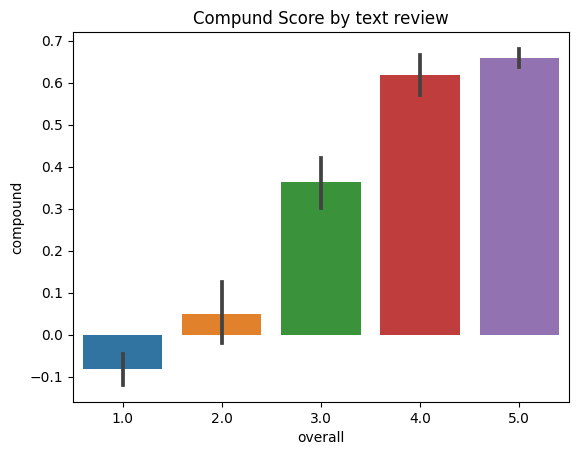

In [19]:
ax = sns.barplot(data=vaders, x='overall', y='compound')
ax.set_title('Compund Score by text review')
plt.show()

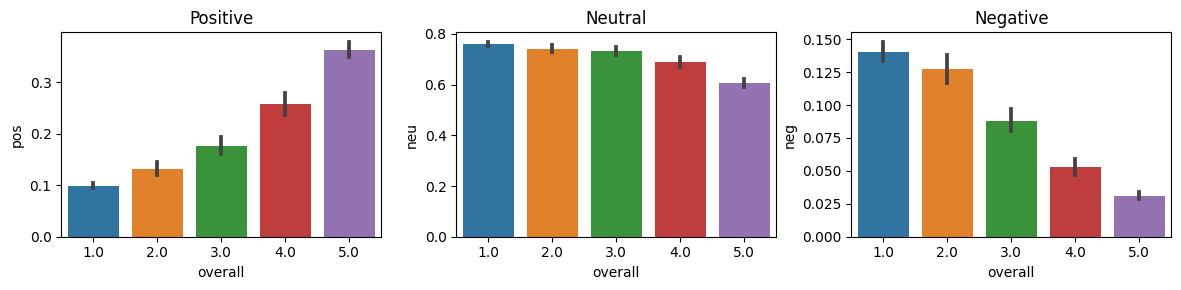

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='overall', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='overall', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='overall', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Model 2 : Roberta pretrained model

In [ ]:
pip install transformers

In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [24]:
def polarity_scores_roberta(input):
  encoded_text = tokenizer(input,return_tensors='pt')
  if encoded_text["input_ids"].shape[1] > 512:
    encoded_text = {
     "input_ids": encoded_text["input_ids"][:, :512],
     "attention_mask": encoded_text["attention_mask"][:, :512]
    }
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
  }
  return scores_dict

In [25]:
result = {}
for i,row in tqdm(reviews.iterrows(),total = len(reviews)):
    try:
      text = row["reviewText"]
      myid = row["index"]
      vader_result = sia.polarity_scores(text)
      # rename vader key name
      vader_result_rename = {}
      for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
      roberta_result = polarity_scores_roberta(text)
      both = vader_result_rename | roberta_result
      result[myid] = both
    except RuntimeError:
      print(f"broke for id {myid}")

  0%|          | 0/3599 [00:00<?, ?it/s]

In [26]:
results_df = pd.DataFrame(result).T
results_df = results_df.reset_index()
results_df = results_df.merge(reviews, how='left')

In [27]:
results_df.columns

Index(['index', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'overall', 'verified',
       'reviewTime', 'reviewerID', 'asin', 'reviewerName', 'reviewText',
       'summary', 'unixReviewTime', 'vote', 'style', 'image'],
      dtype='object')

Compare results

In [28]:
from sklearn.metrics import confusion_matrix

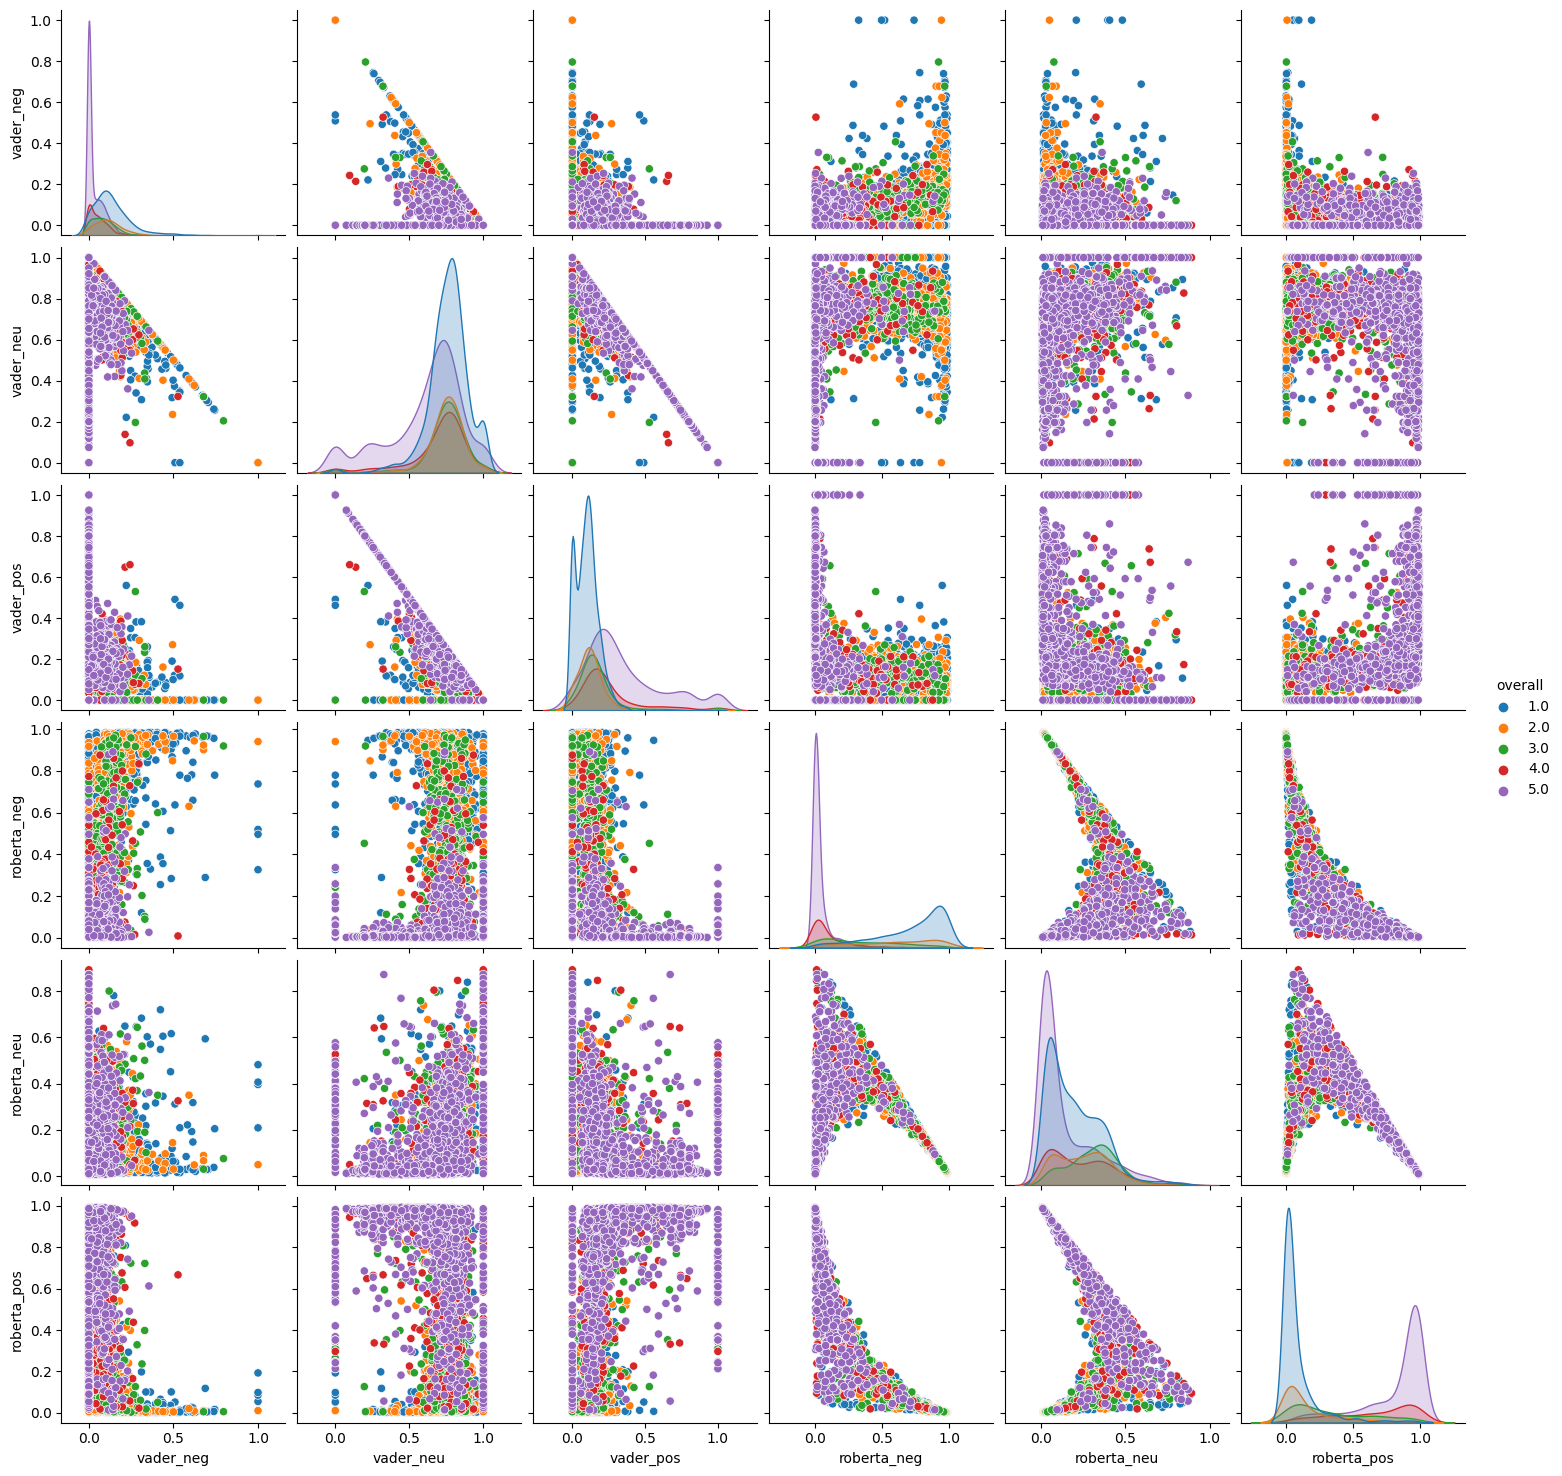

In [29]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='overall',
            palette='tab10')
plt.show()

Roberta model is more confident in seperating positive, negative and neutral sentiment comparing to VADER model.

Review examples: examples that the sentimentn score is most different than the model's prediction.




Example of roberta model mistakenly labeled a 1 score text as positive.

In [30]:
results_df.query('overall == 1.0') \
    .sort_values('roberta_pos', ascending=False)['reviewText'].values[0]

'I mean this game is fantastic it truly is a great game you have to try it out. State of Emergency for Playstation 2 makes one hell of a Coaster! Never again will your drinks leave marks on the furnature with this remarkable gem from Rockstar. I reccomend that anyone who is looking for a something to rest their drinks on try this game.'

Example of VADER model mistakenly labeled a 1 score text as positive.

In [31]:
results_df.query('overall == 1') \
    .sort_values('vader_pos', ascending=False)['reviewText'].values[0]

'Awesome'

Example of roberta model mistakenly labeled a 5 score text as negative.

In [32]:
results_df.query('overall == 5') \
    .sort_values('roberta_neg', ascending=True)['reviewText'].values[0]

'Works great so far, a great game. Works in my GameBoy Player for GameCube and my Gameboy Advance.'

Example of VADER model mistakenly labeled a 5 score text as negative.

In [33]:
results_df.query('overall == 5') \
    .sort_values('vader_neg', ascending=False)['reviewText'].values[0]

'Has worked with no issues'